In [1]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

raw_data = pd.read_excel('./data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
# 전체 데이터의 평균을 보여줘 할 때, T로 인덱스, 칼럼명 변경해서 사용하기
raw_data.describe().T['mean']

pclass        2.294882
survived      0.381971
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
Name: mean, dtype: float64

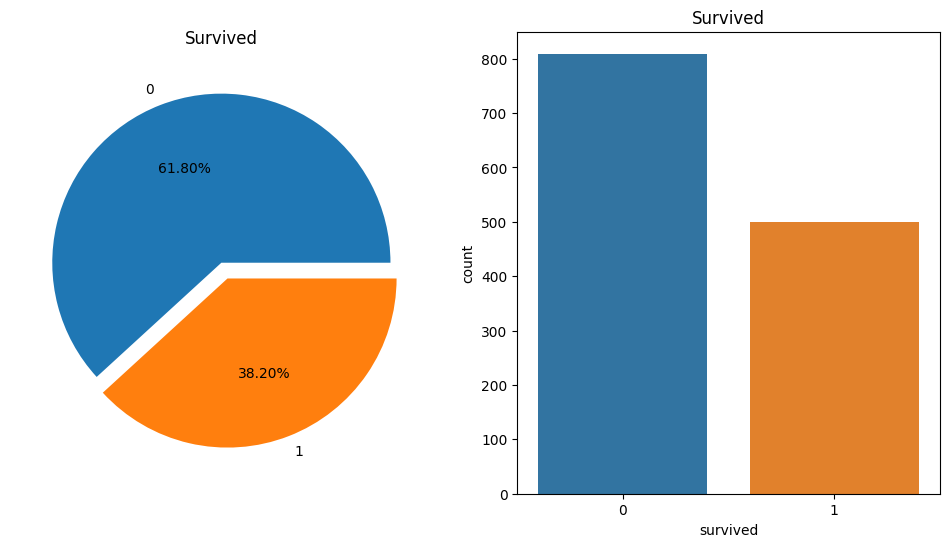

In [5]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: >

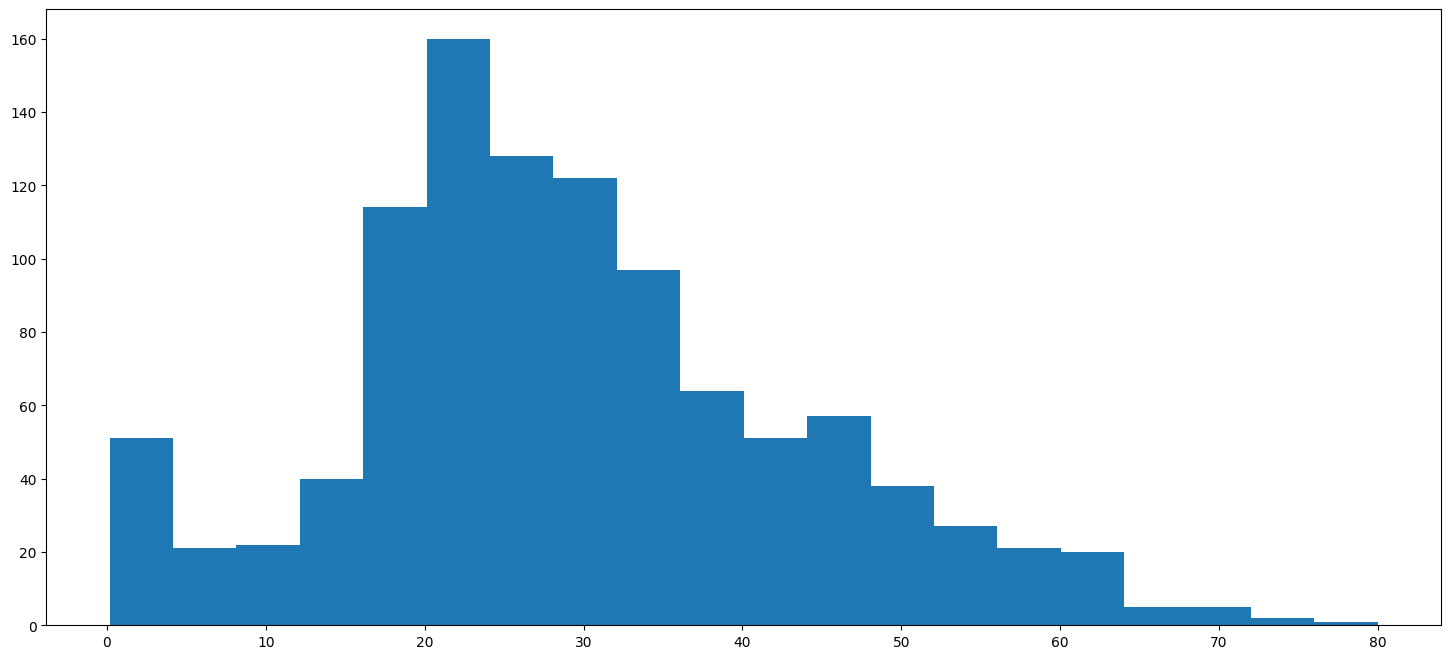

In [6]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False)

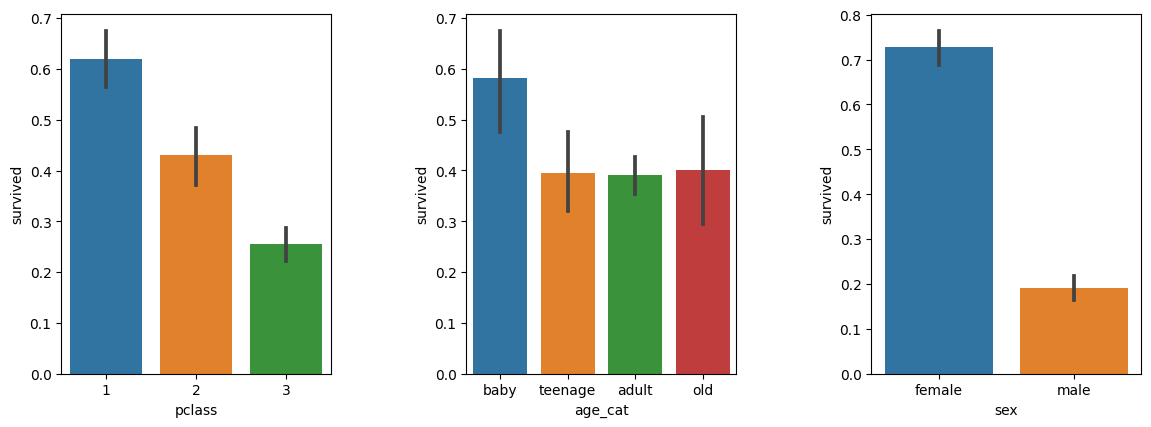

In [7]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=raw_data)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=raw_data)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19068\2973452031.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())],
C:\Users\user\AppData\Local\Temp\ipykernel_19068\2973452031.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())],


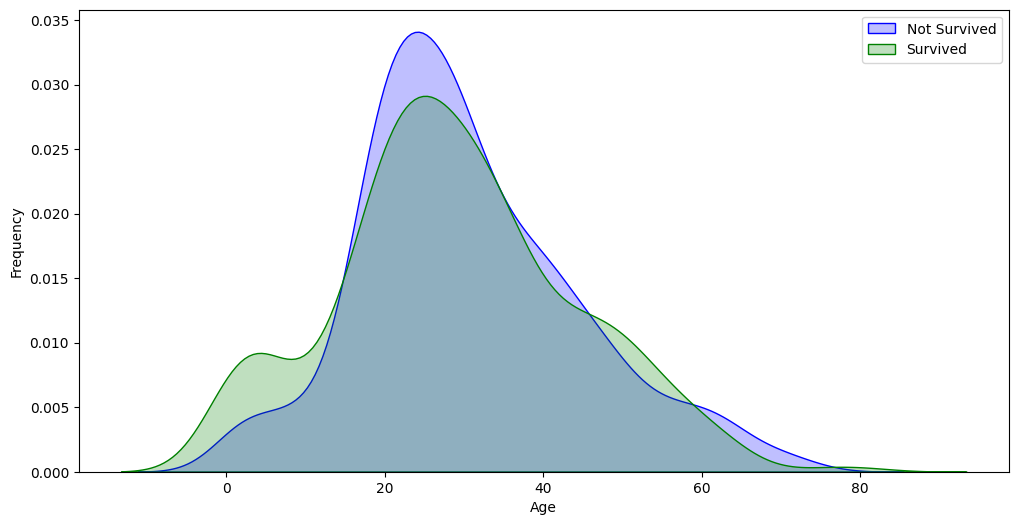

In [8]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

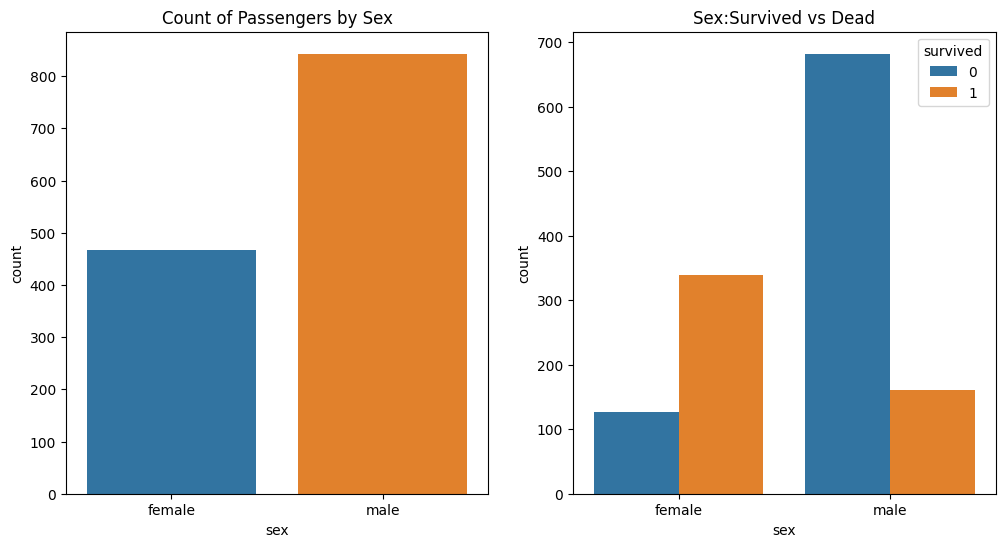

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

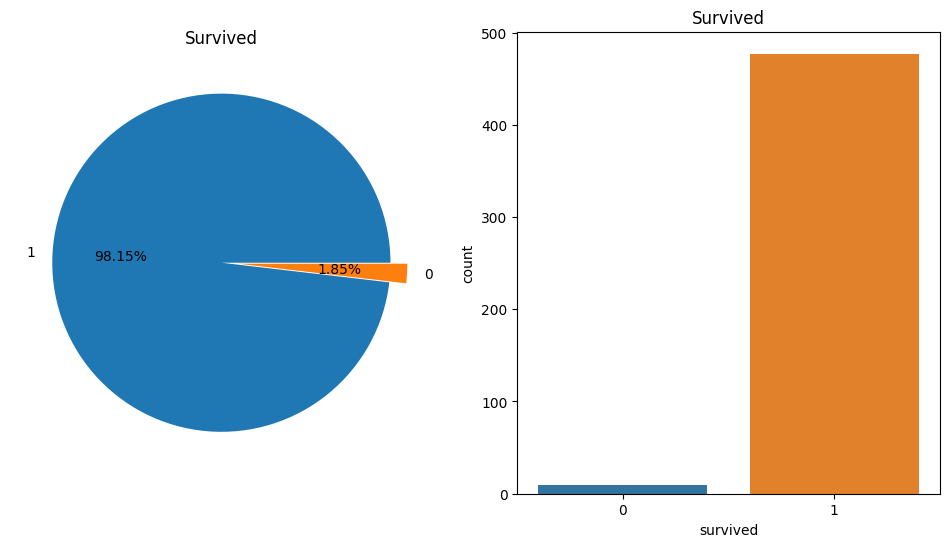

In [10]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [11]:
raw_data['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [12]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    #else:
        #tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float64')
raw_data['pclass'] = raw_data['pclass'].astype('float64')
raw_data['sex'] = raw_data['sex'].astype('float64')
raw_data['sibsp'] = raw_data['sibsp'].astype('float64')
raw_data['parch'] = raw_data['parch'].astype('float64')
raw_data['fare'] = raw_data['fare'].astype('float64')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [13]:
pd.DataFrame(raw_data.values[:, [0,3,4,5,6,8]])

,0,1,2,3,4,5
0,1.0,1.0,29.0,0.0,0.0,211.3375
1,1.0,0.0,0.9167,1.0,2.0,151.55
2,1.0,1.0,2.0,1.0,2.0,151.55
3,1.0,0.0,30.0,1.0,2.0,151.55
4,1.0,1.0,25.0,1.0,2.0,151.55
...,...,...,...,...,...,...
1040,3.0,0.0,45.5,0.0,0.0,7.225
1041,3.0,1.0,14.5,1.0,0.0,14.4542
1042,3.0,0.0,26.5,0.0,0.0,7.225
1043,3.0,0.0,27.0,0.0,0.0,7.225


In [14]:
x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [15]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.12.0
keras version :  2.12.0


In [16]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 255)               1785      
                                                                 
 dense_1 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.get_weights()

[array([[-0.11337328, -0.03088529,  0.02345824, ..., -0.08642747,
         -0.07511423, -0.05026723],
        [-0.09240665, -0.02989213,  0.11478662, ..., -0.12450542,
          0.08027528,  0.0840672 ],
        [ 0.02838862, -0.14358205,  0.12470776, ...,  0.13174933,
          0.09152634, -0.09714736],
        [-0.05422192, -0.06516377, -0.11523564, ...,  0.07331289,
          0.09018956,  0.06267336],
        [-0.09983645, -0.07031456, -0.14511599, ...,  0.1131449 ,
         -0.10203542, -0.08503433],
        [-0.1387823 , -0.134359  ,  0.10499081, ..., -0.07150327,
         -0.09306749, -0.00858992]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [44]:
# % conda install pydot

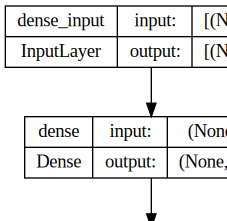

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [30]:
X_train = X_train.astype('float')
y_train = y_train.astype('float')
X_test = X_test.astype('float')
y_test = y_test.astype('float')

In [39]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.8362 - val_loss: 0.1645 - val_accuracy: 0.7810
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.8394 - val_loss: 0.1543 - val_accuracy: 0.8286
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.8372 - val_loss: 0.1593 - val_accuracy: 0.7714
Epoch 4/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.8457 - val_loss: 0.1681 - val_accuracy: 0.8000
Epoch 5/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.8415 - val_loss: 0.1542 - val_accuracy: 0.8190
Epoch 6/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.8415 - val_loss: 0.1767 - val_accuracy: 0.7905
Epoch 7/500
30/30 [==============================] - 0s 1ms/step - loss: 0.1206 - accuracy: 0.8415 - val_loss: 0.1558 - val_accuracy: 0.8000
Epoch 8/500
3

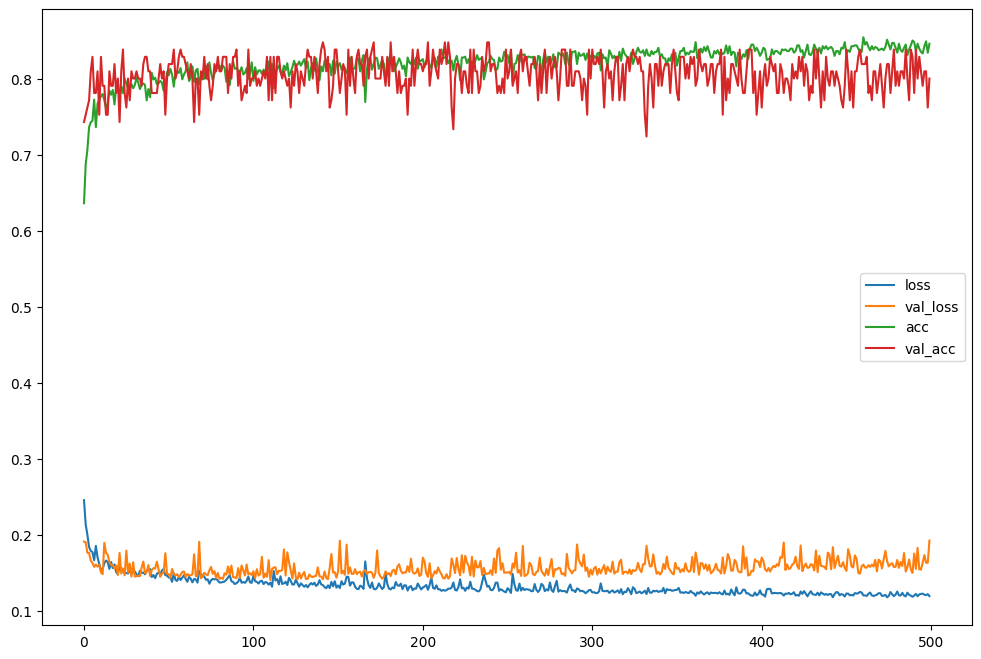

In [35]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [36]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

In [37]:
model.predict(dicaprio)

1/1 [==============================] - 0s 65ms/step


array([[0.09610008]], dtype=float32)

In [38]:
model.predict(winslet)

1/1 [==============================] - 0s 13ms/step


array([[0.9993653]], dtype=float32)

In [ ]:
### 오차행렬 예측값
predict_y = model.predict(X_test)
predict_y[predict_y > 0.5] = 1
predict_y[predict_y <= 0.5] = 0
